In [1]:
from edgar_prelim import *
import pandas as pd
%load_ext autoreload
%autoreload 2
%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
cik='0000004962'

In [3]:
# Parameters
cik = "0000826154"


# Company

In [4]:
cik_df = pd.read_sql(text("select cik, sic, sic_description, company_name, ticker from cik where cik = :cik").bindparams(cik=cik), prelim_engine)
cik_df.rename({'cik': 'CIK', 'sic': 'SIC', 'sic_description': 'Description', 'company_name': 'Name', 'ticker': 'Ticker'}, axis=1).T.rename({0: ''}, axis=1)

,
CIK,0000826154
SIC,6022
Description,STATE COMMERCIAL BANKS
Name,ORRSTOWN FINANCIAL SERVICES INC
Ticker,ORRF


In [5]:
prelims = query_prelims(cik)

# Summary Statistics

In [6]:
prelims.groupby('item').item_value.describe()

,count,mean,std,min,25%,50%,75%,max
item,,,,,,,,
book value per share,15.0,1.708867e+01,7.650291e-01,16.08,16.59,17.04,17.32,18.89
interest income,38.0,1.232037e+07,2.853115e+06,8982000.00,9703500.00,11729500.00,14208250.00,19566000.00
net income,38.0,5.865789e+04,8.478105e+06,-29481000.00,1224500.00,2461500.00,3383000.00,19114000.00
net interest income,38.0,1.015158e+07,1.973388e+06,7701000.00,8513750.00,9390000.00,11647000.00,14689000.00
provision for loan losses,38.0,3.091947e+06,7.260766e+06,-2900000.00,0.00,200000.00,1097500.00,26250000.00


# Plots

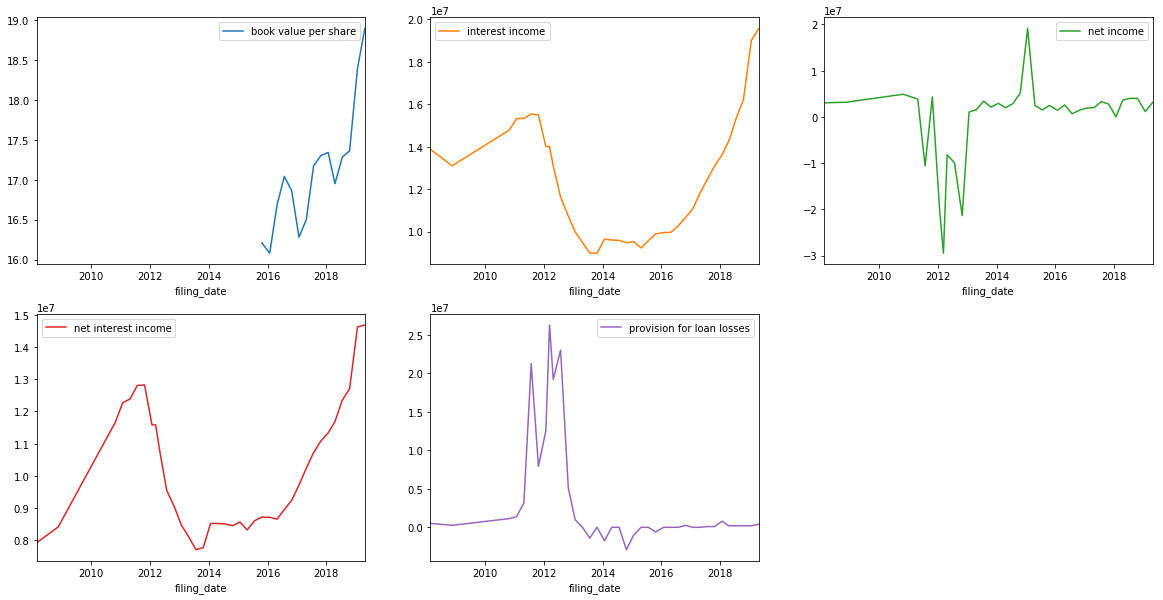

In [7]:
_ = prelims.set_index('filing_date').pivot(columns='item', values='item_value').fillna(method="ffill").plot(subplots=True, layout=(2, 3), figsize=(20, 10), sharex=False)

# Quality

In [8]:
validate_prelims(prelims)

period   msg_type  \
cik        item                                                                 
0000826154 book value per share       2007Q4 to 2015Q2: 31 periods    missing   
           interest income             2008Q1 to 2008Q2: 2 periods    missing   
           interest income             2008Q4 to 2010Q2: 7 periods    missing   
           net income                  2008Q1 to 2008Q2: 2 periods    missing   
           net income                  2008Q4 to 2010Q2: 7 periods    missing   
           net income                                       2011Q4  duplicate   
           net interest income         2008Q1 to 2008Q2: 2 periods    missing   
           net interest income         2008Q4 to 2010Q2: 7 periods    missing   
           provision for loan losses   2008Q1 to 2008Q2: 2 periods    missing   
           provision for loan losses   2008Q4 to 2010Q2: 7 periods    missing   
           provision for loan losses                        2011Q4  duplicate   
           total revenue                                      None      empty   

                                                 message  
cik        item                                           
0000826154 book value per share           Missing period  
           interest income                Missing period  
           interest income                Missing period  
           net income                     Missing period  
           net income                     Missing period  
           net income                   Duplicate period  
           net interest income            Missing period  
           net interest income            Missing period  
           provision for loan losses      Missing period  
           provision for loan losses      Missing period  
           provision for loan losses    Duplicate period  
           total revenue              No values for item

# Data

In [9]:
def make_clickable(val: str) -> str: 
    if isinstance(val, str):
        name, url = val.split('#')
        return f'<a href="{url}">{name}</a>'
    else:
        return ''

(prelims
 .assign(fiscal_period = prelims.fiscal_period.str.cat(prelims.filing_href, sep='#'), filing_date = prelims.filing_date.map(lambda d: d.strftime('%Y-%m-%d')))
 .loc[:, ['filing_date', 'fiscal_period', 'item', 'item_value', 'src_table', 'src_row', 'src_column', 'src_value', 'src_units']]
 .set_index(['filing_date', 'item'])
 .style.format({'fiscal_period': make_clickable})
)

In [10]:
#discard_prelim(cik, date(2019, 12, 31))
#force_reload_prelim(cik, date(2019, 12, 31), delete_filings=False)
#force_reload_prelim_between(cik,  start=date(2002, 6, 1), end=date(2019, 12, 31), delete_filings=False)

In [11]:
#d = date(2018, 10, 29)
#extract_prelim_statements(cik, start=d, end=d)

In [12]:
#d = date(2019, 4, 22)
#filings = query_edgar_for_filings(cik, "8-K", start=d, end=d, require_xbrl=False)
#report = query_edgar_for_submission_text(filings[0].href)
#submission = load_submission(report.href)
#tables = list(parse_tables(submission))
#items_from_tables(tables)

In [13]:
#widget = query_prelims_for_override(cik, filing_date='2006-01-27', item=None)
#widget

In [14]:
#widget.save()